# Lección 2: Modelos de regresión

Autor: Jorge Castro, Fabricio Quirós Corella

Dentro del área del aprendizaje supervisado, existen principalmente dos tipos de problemas: **regresión** y **clasificación**. En esta lección nos centraremos en los problemas de regresión y en la siguiente en los problemas de clasificación.

## Regresión lineal

Imaginemos que lideramos una pequeña empresa que vende autos usados y nos interesa desarrollar un modelo para estimar el valor de los vehículos. Para realizar esta tarea, decidimos inicialmente usar datos históricos sobre los precios de otros vehículos previamente vendidos (en dólares) según el tamaño de su motor (en pulgadas cúbicas).

![](https://drive.google.com/uc?export=view&id=19RAWKgwydltTxaeqOXSm5Z-bzzWynODP)

In [ ]:
#Código para cargar el dataset
from google.colab import files
uploaded = files.upload()

In [ ]:
#Código para montar el Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Luego de importar las librerías de interés, se procede a cargar el set de datos:


In [ ]:
import pandas as pd #biblioteca para lectura de datos estructurados y su manipulación
import numpy as np  #biblioteca para realizar operaciones con vectores y matrices
import matplotlib.pyplot as plt #biblioteca para visualización de datos

filepath = '/content/drive/MyDrive/MachineLearning/datasets/car_dataset.csv'
ds = pd.read_csv(filepath, header=0)

Se sugiere realizar una exploración preliminar del objeto asociado al dataset, mediante los siguientes comandos:

In [ ]:
ds.shape #Dimensiones del dataset

(193, 25)

In [ ]:
ds.head() #Imprimir primeras cinco filas del dataset

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
ds.info() #Imprimir información más detallada sobre el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    int64  
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non

<Axes: xlabel='engine-size', ylabel='price'>

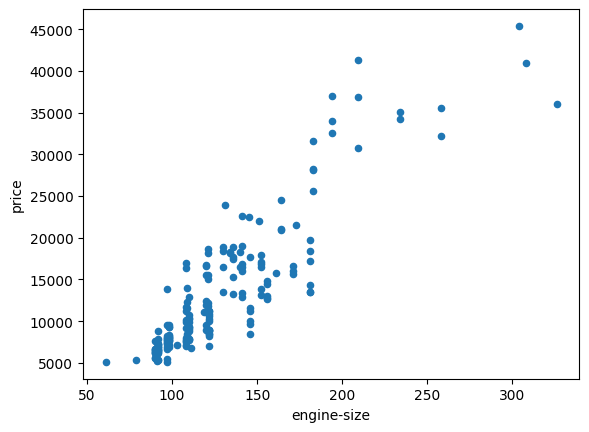

In [ ]:
#Tamaño del motor en pulgadas cúbicas versus precio del auto en dólares
ds.plot.scatter('engine-size','price')

<Axes: xlabel='engine-size', ylabel='horsepower'>

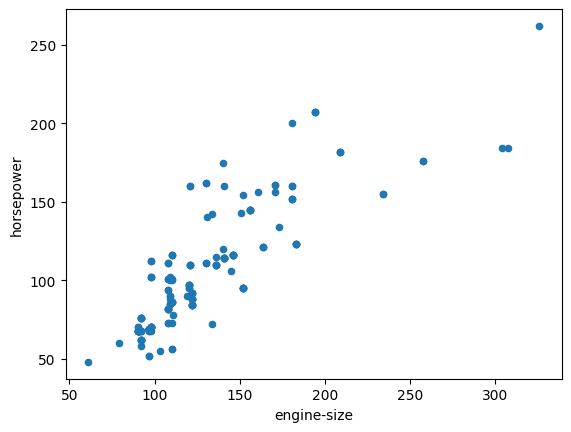

In [ ]:
# Tamaño del motor vs los caballos de fuerza
ds.plot.scatter('engine-size','horsepower')

Ahora, supongamos que queremos poner a la venta un vehículo cuyo motor pesa 220 pulgadas cúbicas, ¿Cuál debería ser su precio de acuerdo al histórico de ventas? Para ello, utilizamos un modelo de Regresión Lineal:

![](https://drive.google.com/uc?export=view&id=1nkAfBOZkianCeSmvpu0lD0QVo1THxXL_)



Price prediction: $29166.8212672687


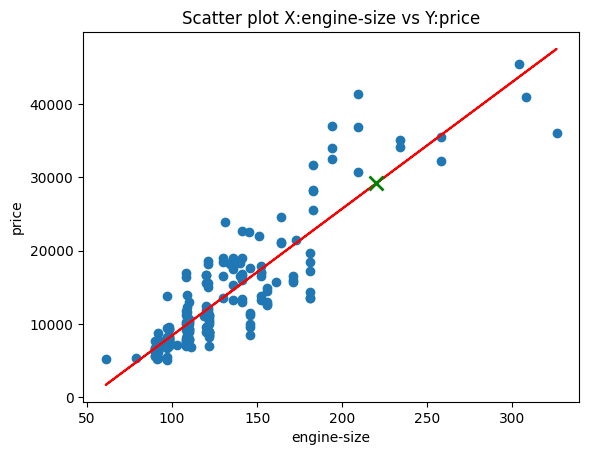

In [ ]:
from sklearn.linear_model import LinearRegression #biblioteca de machine learning en Python

rl = LinearRegression()  # crea un objeto del modelo de regresión lineal
x_tag = 'engine-size' # etiqueta independiente
y_tag = 'price' # etiqueta dependiente
x = ds[[x_tag]].values # genera arreglo de entrenamiento según tamaño del motor
y = ds[[y_tag]].values # genera arreglo de dato a predecir

rl.fit(x,y)  # ejecuta la regresión lineal: relaciona de forma lineal los valores del tamaño del motor a su precio
Y_pred = rl.predict(x)  # el modelo genera predicciones a partir de los valores de tamaño de motor

# Diagrama de dispersión y modelo de regresión lineal
plt.title('Scatter plot X:{} vs Y:{}'.format(x_tag, y_tag))
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.xlabel(x_tag)
plt.ylabel(y_tag)

#Imprimir valor a predecir
eng_size = 220
test_value = np.array([[eng_size]])
pred = rl.predict(test_value)
plt.plot(eng_size, pred, color='green', marker='x', markersize=10, mew=2)
print('Price prediction: ${}'.format(pred[0][0]))

plt.show()

Se pueden obtener los parámetros del modelo de regresión lineal `(y = mx + b)` y así realizar las estimaciones:

In [ ]:
#Parámetros de la linea (y = mx + b)
print('Linear Regression parameters:',rl.coef_,rl.intercept_)
print('Price vehicle of 220 cubic inches motor size:', rl.coef_[0][0]*220 + rl.intercept_[0])

Linear Regression parameters: [[172.86186017]] [-8862.78797073]
Price vehicle of 220 cubic inches motor size: 29166.8212672687


**QUIZ PROBLEMAS REGRESIÓN LINEAL #1**

¿Qué problema se observa en las predicciones hechas por el modelo de regresión lineal a partir del tamaño del motor?

![](https://drive.google.com/uc?export=view&id=1UtOKM0jb8-JZiwgGDQCCqoG-MNzNBFhY)

1. El modelo es un tanto simple para representar con presición el comportamiento de los datos

2. La predicción para el motor de 220 pulgadas cúbicas es poco realista

3. Existe mucha variabilidad en el rango de precios para un mismo tamaño de motor

4. la 1 y la 3

5. Todas las anteriores


## Medición del desempeño de un modelo de regresión

El desempeño de un modelo de regresión puede medirse usando el coeficiente de determinación, denotado como $R^2$, el cual indica cuánta variación en la variable de respuesta puede ser explicada por la dependencia respecto a los predictores según el modelo particular de regresión. De esta forma, entre más grande sea $R^2$ mejor es el ajuste del modelo a los datos y por lo tanto mejor es la capacidad del modelo de explicar la variación de la salida en función de los predictores. El rango de valores de $R^2$ va de cero a uno. Matemáticamente $R^2$ se define como:

$R^2=1-\frac{SS_\text{Reg}}{SS_\text{Total}}=1-\frac{\sum_{i}{(y_i-\hat{y}_i)^2}}{\sum_{i}{(y_i-\bar{y})^2}}$

donde $y_i$ es el iésimo valor de la variable de respuesta $y$, $\hat{y}_i$ es su valor estimado según el modelo de regresión y  $\bar{y}$ es el valor promedio de $y$.

In [ ]:
#Medición del desempeño de la regresión

#R2 usando RL y el tamaño del motor
rScore = rl.score(x, y)
print('R^2:', rScore)

R^2: 0.7899272137265414


### Regresión polinomial

Como es evidente, el desempeño del modelo de Regresión Lineal no es tan cercano a 1 como se hubiera esperado, por lo que existen estrategias, para mejorar la capacidad de estimación del modelo.

**1. Aumentar la complejidad del modelo**

En este caso, podemos aumentar la complejidad del modelo mediante el uso una función polinomial en lugar de una lineal para aproximar la distribución de los datos y así generar las predicciones.

Price prediction: $29296.091221902898
R^2: 0.7930740643803553


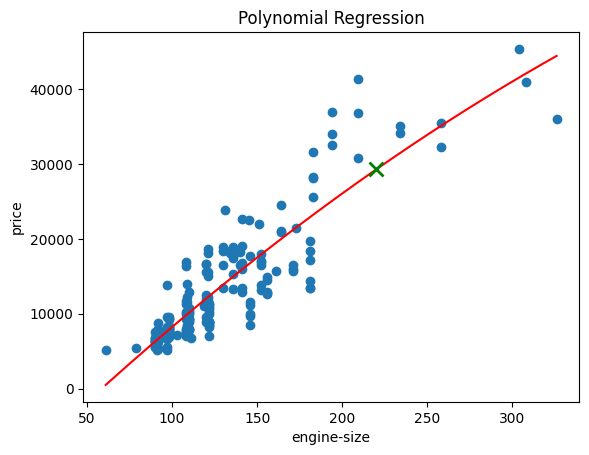

In [ ]:
#Opcion 1: aumentar la complejidad
from sklearn.preprocessing import PolynomialFeatures

#Transformación de la entrada al grado del polinomio de interés
degree = 2
x_pol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x)
#print(x_pol) #nueva entrada

#Ajuste de la regresión polinomial
rpol = LinearRegression().fit(x_pol, y)

#Impresion en pantalla del modelo
plt.scatter(x, y)
x_seq = np.linspace(x.min(),x.max(),x.size).reshape(-1,1)
y_curve = rpol.predict(PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x_seq))
plt.plot(x_seq, y_curve, color='red')
plt.title('Polynomial Regression')
plt.xlabel(x_tag)
plt.ylabel(y_tag)

#Imprimir valor a predecir
test_value = np.array([[eng_size]])
test_pol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(test_value)
pred = rpol.predict(test_pol)
plt.plot(eng_size, pred, color='green', marker='x', markersize=10, mew=2)
print('Price prediction: ${}'.format(pred[0][0]))

#Desempeño de la regresión polinomial
rScore = rpol.score(x_pol, y)
print('R^2:', rScore)

**2. Aumentar la cantidad de variables independientes**

En el contexto de aprendizaje automático las variables independientes son llamadas **entradas**, **características** (*features*) o **predictores**. Asimismo, las variables dependientes son llamadas **salidas** o **variables de respuesta** (*responses*).

### Regresión lineal multivariada

Cuando aplicamos una regresión usando dos o más entradas para predecir la variable de respuesta hablamos de una **regresión multivariada**. Por ejemplo, podríamos usar la información del peso total del vehículo y el tamaño del motor para predecir su precio.

In [ ]:
#Segunda Opción: aumentar la cantidad de variables independientes (features)

#Regresión multivariada lineal
rl2 = LinearRegression()  # create a linear regression model (object)
x2 = ds[['curb-weight','engine-size']].values
y2 = ds[['price']].values

rl2.fit(x2,y2)  # perform linear regression

#Imprimir valor a predecir
test_value = np.array([[500, 220]])
pred2 = rl2.predict(test_value)
print('Price prediction: ${}'.format(pred[0][0]))

#R2 usando RL y dos variables
rScore2 = rl2.score(x2, y2)
print('R^2:', rScore2)

#R2 usando RL y tres variables numéricas
x3 = ds[['curb-weight','engine-size', 'horsepower']].values
rl3 = LinearRegression()  # create a linear regression model (object)
rl3.fit(x3,y2)  # perform linear regression
rScore3 = rl3.score(x3, y2)
print('R^2:', rScore3)

#Imprimir valor a predecir
test_value = np.array([[500, 220, 150]])
pred3 = rl3.predict(test_value)
print('Price prediction: ${}'.format(pred[0][0]))


Price prediction: $29296.091221902898
R^2: 0.8103051024971152
R^2: 0.8194956061511467
Price prediction: $29296.091221902898


![](https://drive.google.com/uc?export=view&id=1SNoCCl6IlEj_eUvDExmRF7ORKMZ3D4Wk)


Ahora, ¿cómo incorporar variables categóricas al modelo de regresión?

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    int64  
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non

Veamos qué tanto puede mejorar el coeficiente de determinación si agregamos otra variable categórica al modelo de regresión.

In [ ]:
#Ejemplo usando una variable categórica
x_cat = pd.get_dummies(ds[['num-of-cylinders']]) #Convierte una variable categórica en una variable indicadora
x_num = ds[['curb-weight','engine-size','horsepower']]

#Valor a estimar
y4 = ds[['price']].values

x4 = pd.concat([x_cat.reset_index(drop=True), x_num], axis=1)
x4 = x4.values

#Ajuste del modelo de regresión
rl4 = LinearRegression()  # create a linear regression model (object)
rl4.fit(x4, y4)  # perform lin

#Valor R2
rScore4 = rl4.score(x4, y2)
print('R^2:', rScore4)

R^2: 0.8473956617892356


In [ ]:
#Ejemplo usando dos variable categórica
x_cat = pd.get_dummies(ds[['num-of-cylinders', 'engine-type']]) #Convierte variables categórica en variables indicadora
x_num = ds[['curb-weight', 'engine-size', 'horsepower',  'peak-rpm']]

#Crea el arreglo de entrenamiento
x5 = pd.concat([x_cat.reset_index(drop=True), x_num], axis=1)
x5 = x5.values
y5 = y4

#Ajuste del modelo de regresión
rl5 = LinearRegression()  # create a linear regression model (object)
rl5.fit(x5, y5)  # perform linear regression

#Valor R2
rScore5 = rl5.score(x5, y5)
print('R^2:', rScore5)

R^2: 0.8943483081505778


Es posible combinar ambas opciones para tener mejoras en el desempeño del modelo:

In [ ]:
#Podemos estimar el grado de sobreajuste al observar el error de varianza
ds_test = ds

x_test = ds_test[['curb-weight','engine-size','horsepower','peak-rpm']].values # variables independientes numéricas
y_test = ds_test[['price']].values # variable dependiente numérica

degree = 4
x_pol_test = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x_test)
x_cat_test = pd.get_dummies(ds_test[['num-of-cylinders', 'engine-type']])

#Concatenar variables categóricas y polinomiales
# pd.concat()
x_test = np.concatenate((x_pol_test, x_cat_test.values),axis=1)

#Ajuste del modelo de regresión polinomial
rl = LinearRegression()  # create a linear regression model (object)
rl.fit(x_test, y_test)  # perform linear regression

#Prediciones del modelo utilizando `ground truth`
Y_pred_test = rl.predict(x_test)  # make predictions

#Valor R2
rScore_test = rl.score(x_test, y_test)
print('Test R^2:', rScore_test)
#print(Y_pred_test)

Test R^2: 0.9756066076869777


In [ ]:
y_test[1:10]

array([[16500.],
       [16500.],
       [13950.],
       [17450.],
       [15250.],
       [17710.],
       [18920.],
       [23875.],
       [16430.]])

In [ ]:
Y_pred_test[1:10]

array([[13555.89531466],
       [17441.95505367],
       [11842.64818781],
       [17119.43350605],
       [14696.91254904],
       [16642.00456748],
       [20395.06751645],
       [22417.29376178],
       [13617.20478815]])

## Modelos adicionales

Existen otros modelos de regresión más complejos que nos podrían funcionar par mejorar el desempeño como:
1. Máquinas de soporte vectorial (SVM)
2. Árboles de decisión
3. Bosques aleatorios (Random Forest)
4. Redes neuronales profundas (DNN)

## Consideraciones sobre los modelos de regresión

1. Es importante destacar que en un problema de regresión las entradas pueden ser continuas, discretas o categóricas pero la variable de respuesta es **continua**.
2. Los coeficientes de la regresión lineal se obtienen a través del método de mínimos cuadrados que minimiza la suma de residuales cuadrados (SSR).
![](https://drive.google.com/uc?export=view&id=1S4RAc4lcnxAk6mIyTKsNZAxyXxl3nsGd)
3. El $R^2$ es una de las principales métricas para medir el desempeño de una regresión, pues explica qué tanta variabilidad en la respuesta puede ser explicada por el modelo. Sin embargo, es importante resaltar que existen muchas métricas más para medir el desempeño de un modelo de regresión como el error cuadrático medio (MSE) y el  error absoluto medio (MAE).
4. En todo set de datos estructurado, cada variable independiente representa una dimensión y un grupo de dimensiones constituye una observación como un vector de características. Los algoritmos de ML puede tener inconvenientes con distribuciones de datos que contengan múltiples dimensiones; es decir, modelos que sean multivariados, puesto que una gran cantidad de variables independientes implican una gran cantidad de datos de entrenamiento que requiere el modelo. Esta dificultad con espacios de alta dimensionalidad se conoce como **la maldición de la dimensionalidad**.
5. La meta de un modelo de regresión puede ser la **predicción** de la respuesta a partir de un conjunto de variables de entrada o bien la **cuantificación** de la fuerza y tipo de relación entre la respuesta y las variables de entrada.

### Subajuste, ajuste y sobre ajuste


La escogencia del grado óptimo de la función de regresión polinomial no es trivial y dependerá de cada caso, sin embargo es importante tener en cuenta dos problemas que pueden surgir a raíz de esta decisión: el **subajuste o error de sesgo (underfitting)** y el **sobreajuste o error de varianza (overfitting)**. El subajuste ocurre cuando un modelo no es capaz de capturar correctamente el patrón que siguen los datos de entrenamiento usualmente debido a su simplicidad o falta de entrenamiento. El sobreajuste ocurre cuando el modelo se ajusta demasiado bien a los datos de entrenamiento pero su desempeño es significativamente menor cuando se aplica a nuevos datos. Más adelante veremos algunas técnicas para tratar de reducir ambos problemas.


![](https://drive.google.com/uc?export=view&id=1ScfODq4okGdzSp-ByIcQPDuijgDeH2ok)


¿Cómo reducir el sobreajuste?

  1. Usar más datos de entrenamiento
  2. Aumentado de datos
  3. Validación cruzada
  4. Selección de variables
  5. Regularización

**QUIZ PROBLEMAS REGRESIÓN LINEAL 2**

Si se tiene el siguiente modelo de regresión lineal para predecir $y$ en función de $x_1$:

![](https://drive.google.com/uc?export=view&id=1uRjDqrEqjASWp1rUYo079bMgUZCnaLX5)

Cuál sería la forma más simple y económica de mejorar el desempeño del modelo:

- Recolectar datos sobre variables independientes adicionales ($x_2,x_3,...$) para incorporarlas al modelo
- Recolectar observaciones adicionales de $x_1$ y reentrenar el modelo
- Aumentar la complejidad del modelo de regresión
- La 2 y la 3


El problema que afronta el modelo anterior es un problema de:

- Sobreajuste
- Subajuste
- La 1 y la 2
- Ninguna de las anteriores

## Práctica 2

Usando el dataset *obesity_train.csv* y guiándose con la descripción de sus variables en el archivo *obesity_description.txt*:
1. Obtenga un modelo de regresión que estime el peso de una persona a partir de su altura y edad. Luego, imprima en pantalla la métrica $R^2$ para medir el desempeño del modelo.
2. Obtenga un nuevo modelo que estime el peso de una persona a partir de las 2 variables anteriores y al menos una variable **categórica** más. Luego, imprima en pantalla la métrica $R^2$ para medir el desempeño del modelo.
3. Implemente el modelo de regresión con el máximo valor de $R^2$ usando cualquier número de variables y aumentando el grado del polinomio para predecir el peso de una persona.

In [ ]:
#Puede realizar su práctica aquí

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv("/content/drive/MyDrive/datasets/obesity_train.csv", header=0)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,20.254534,1.569480,41.324558,no,yes,2.392665,1.0,Frequently,no,1.000000,no,0.000000,0.738269,Sometimes,Public_Transportation,Insufficient_Weight
1,Male,36.542885,1.750000,119.434645,yes,yes,2.729890,3.0,Sometimes,no,2.030084,no,0.592607,0.754417,Sometimes,Automobile,Obesity_Type_II
2,Female,26.000000,1.624134,111.531208,yes,yes,3.000000,3.0,Sometimes,no,2.609188,no,0.000000,0.174030,Sometimes,Public_Transportation,Obesity_Type_III
3,Male,22.200779,1.769328,105.000576,yes,yes,2.685484,3.0,Sometimes,no,2.649459,no,1.000000,0.000000,Sometimes,Public_Transportation,Obesity_Type_I
4,Male,17.120699,1.809251,58.968994,yes,yes,2.524428,4.0,Sometimes,no,2.000000,no,2.000000,0.038380,no,Automobile,Insufficient_Weight


In [7]:
# 1) R^2 usando altura y peso.
x = df[['Height', 'Age']].values
Y = df[['Weight']].values

rl = LinearRegression()
rl.fit(x, Y)

rScore = rl.score(x, Y)
rScore

0.25582809406905216

In [9]:
# 2) Usando variable categórica
x_cat = pd.get_dummies(df[['family_history_with_overweight']])
x = np.concatenate((x, x_cat.values),axis=1)

rl = LinearRegression()
rl.fit(x, Y)

rScore = rl.score(x, Y)
rScore

0.3812278083981312

In [19]:
# 3) Usando rgresión polinomial
x = df[['Height', 'Age', 'CH2O']].values
x_cat = pd.get_dummies(df[['family_history_with_overweight', 'NObeyesdad', 'SMOKE', 'Gender']])

x_pol = PolynomialFeatures(degree=5, include_bias=False).fit_transform(x)
x = np.concatenate((x_pol, x_cat.values), axis=1)

Y = df[['Weight']].values

rl = LinearRegression()
rl.fit(x, Y)

rScore = rl.score(x, Y)
rScore

0.9737737249674411